In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data

df = pd.read_csv("listings_wrangled")
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,bedrooms,bathrooms_text,amenities
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,0.03,1,267,1,2.0,1.5 baths,"[""HDTV with Disney+, HBO Max, standard cable, ..."
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,0.73,1,0,0,1.0,1 shared bath,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide..."
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0.30,2,322,0,1.0,NaN,"[""Heating"", ""Wifi"", ""Long term stays allowed"",..."
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,3.38,1,79,50,1.0,1 bath,"[""Shampoo"", ""Conditioner"", ""TV"", ""Drying rack ..."
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,0.31,3,365,1,NaN,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ..."


To get a better understanding of the data, I will start of with answering a few questions.

> What is the average price, per night for a short-term renta in NYC based on the Airbnb listings data.

In [3]:
avg_price = round(df.price.mean(),2)
print(avg_price)

222.14


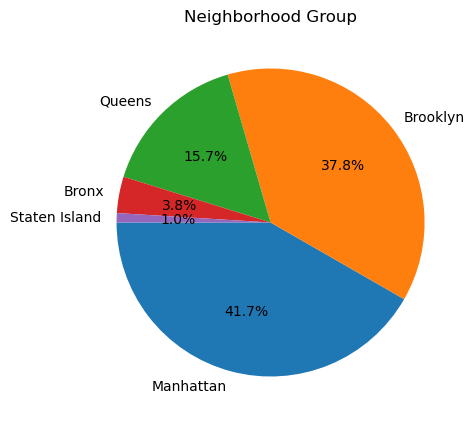

In [4]:
plt.figure(figsize=(9,5))
plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title("Neighborhood Group")
plt.show()

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


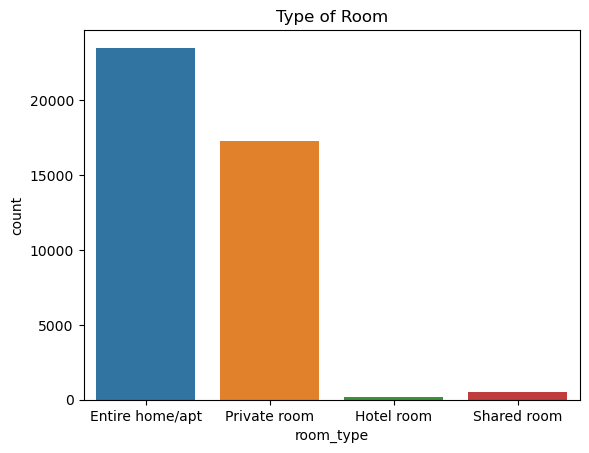

In [5]:
plt.figure()
plt.title("Type of Room")
sns.countplot(df.room_type)

plt.show()

Entire home/apt has the greatest share, followed by Private room. Shared rooms aren't too popular. Hotel room listings will be dropped.

In [6]:
df = df[df.room_type != 'Hotel room']

Room types on Neighborhood group

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


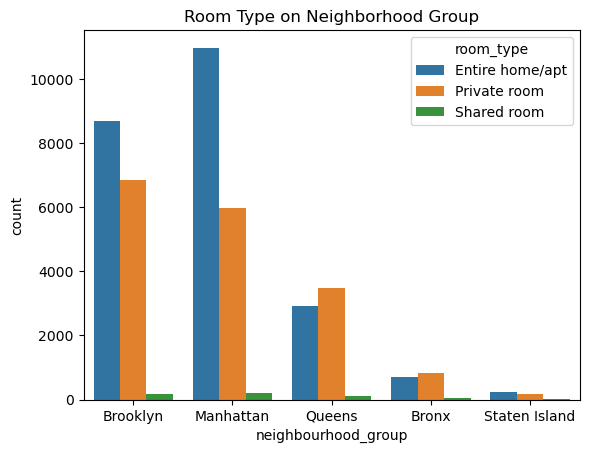

In [7]:
plt.figure()
plt.title("Room Type on Neighborhood Group")
sns.countplot(df.neighbourhood_group, hue=df.room_type)
plt.show()

Interestingly, Queens and the Bronx residents are more likely to list a private room then the entire unit.

Next lets compare their availability.

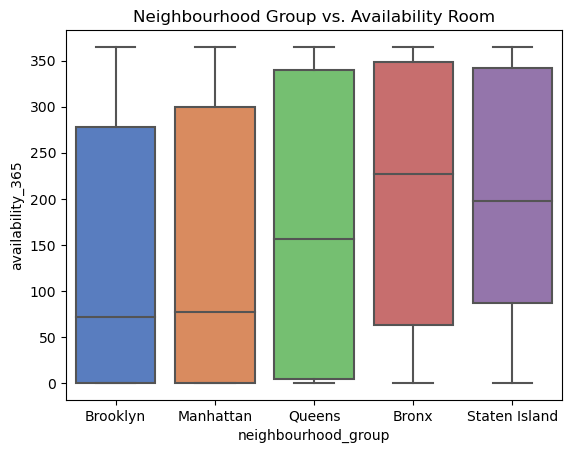

In [8]:
# plt.style.use('classic')
plt.figure()
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="muted")
plt.show()

Next price distribution

In [9]:
df.price.describe()

count    41345.000000
mean       221.095296
std        921.149523
min         10.000000
25%         80.000000
50%        130.000000
75%        220.000000
max      98159.000000
Name: price, dtype: float64

In [10]:
(df.price > 500).value_counts()

False    38952
True      2393
Name: price, dtype: int64

I took care of the "free" listings in an earlier step, but I haven't addressed the other outliers that are skewing the distribution. With a Max price over 400 times larger than the mean price, it will be difficult to meaningfully visualize the data. Since the 75th percentile is 220,  excluding any listings above $500 will allow me to better see the spread. Those listings still represent over 15% of data though, so it is important not to draw any conclusions just yet. 

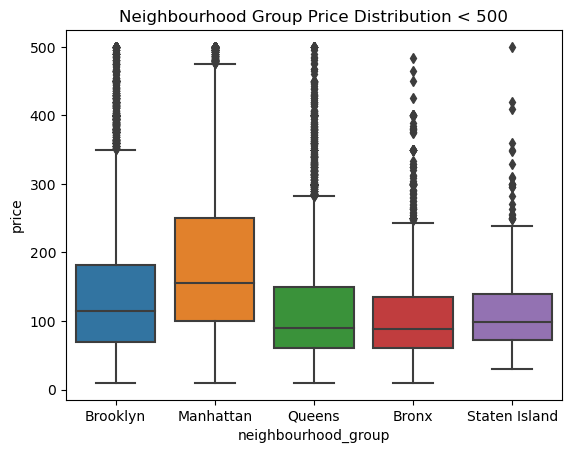

In [11]:
df_u500 = (df[df.price <= 500])
sns.boxplot(x='neighbourhood_group', y='price', data=df_u500)
plt.title('Neighbourhood Group Price Distribution < 500')
plt.show()


In [12]:
boroughs = df.groupby("neighbourhood_group")["price"].agg(["sum", "mean", "median", "count"])
boroughs = boroughs.round(2).sort_values("mean", ascending=False)
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, np.inf]
df["price_range"] = pd.cut(df["price"], bins=ranges, labels=label_names)
# prices_by_borough = df.groupby(["neighbourhood_group", "price_range"])["price_range"].count()
df.price_range.value_counts(sort=False)


Budget          7799
Average        19102
Expensive       9942
Extravagant     4502
Name: price_range, dtype: int64

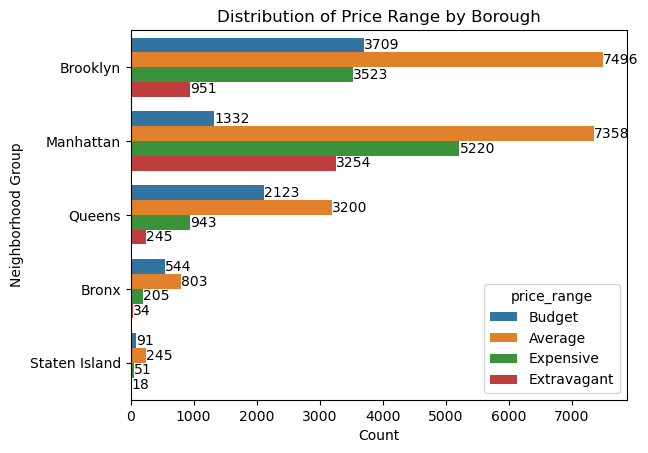

In [13]:
ax = sns.countplot(y='neighbourhood_group', hue='price_range', data=df)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel('Neighborhood Group')
plt.xlabel('Count')
plt.title('Distribution of Price Range by Borough')
plt.show()

<AxesSubplot:>

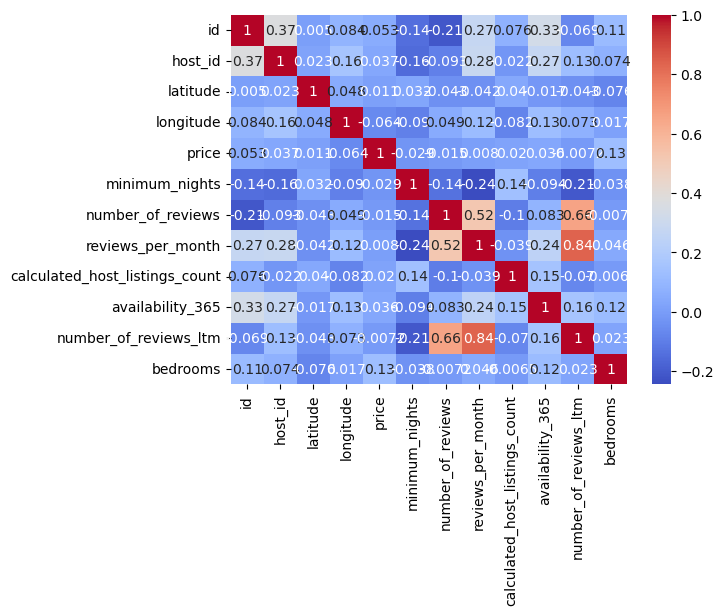

In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [17]:
one_hot = pd.get_dummies(df['neighbourhood_group'])
df = pd.concat([df, one_hot], axis=1)
df.head()
# features = list('price','bedrooms', '')

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,...,0,1,0,0,0,0,1,0,0,0
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,...,0,0,1,0,0,0,0,1,0,0
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,...,0,1,0,0,0,0,1,0,0,0
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,...,0,0,1,0,0,0,0,1,0,0
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,...,0,0,1,0,0,0,0,1,0,0


In [15]:

# print(df.groupby(["bathrooms_text", "rooms"])["price_range"].count())
# df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)',expand=False).astype(float)
df.bathrooms_text.info

<bound method Series.info of 0            1.5 baths
1        1 shared bath
2                  NaN
3               1 bath
4               1 bath
             ...      
41498    1 shared bath
41499           1 bath
41500        4.5 baths
41501        4.5 baths
41502           1 bath
Name: bathrooms_text, Length: 41345, dtype: object>